In [77]:
cgi_c_code = """
/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>

"""
cgi_c_code += r"""
int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}
"""
cgi_c_code += r"""
int cgi_decode(char *s, char *t) {
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%') {
            int digit_high = *++s;
            int digit_low = *++s;
            if (hex_values[digit_high] >= 0 && hex_values[digit_low] >= 0) {
                *t++ = hex_values[digit_high] * 16 + hex_values[digit_low];
            }
            else
                return -1;
        }
        else
            *t++ = *s;
        s++;
    }
    *t = '\0';
    return 0;
}
"""
cgi_c_code += r"""
int main(int argc, char *argv[]) {
    init_hex_values();

    if (argc >= 2) {
        char *s = argv[1];
        char *t = malloc(strlen(s) + 1); /* output is at most as long as input */
        int ret = cgi_decode(s, t);
        printf("%s\n", t);
        return ret;
    }
    else
    {
        printf("cgi_decode: usage: cgi_decode STRING\n");
        return 1;
    }
}
"""

In [78]:
with open("cgi_decode.c", "w") as f:
    f.write(cgi_c_code)

In [79]:
import sys,os
PROJECT_DIR = 'D:\一些资料\实验室\Coding'
print('Current pwd = ',os.path.join(PROJECT_DIR, 'fuzzingbook-notebooks'))
sys.path.append(os.path.join(PROJECT_DIR, 'fuzzingbook-notebooks'))
from bookutils import print_file
print_file("cgi_decode.c")

Current pwd =  D:\一些资料\实验室\Coding\fuzzingbook-notebooks
/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>


int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}

int cgi_decode(char *s, char *t) {
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%') {
            int digit_high = *++s;
            int digit_low

In [80]:
#设置编码格式
!chcp 65001

Active code page: 65001


In [81]:
#编译C程序
!gcc --coverage -o cgi_decode cgi_decode.c 

In [82]:
#尝试运行
!cgi_decode 'Send+mail+to+me%40fuzzingbook.org'

'Send mail to me@fuzzingbook.org'


In [83]:
#查看trace结果
result = !gcov cgi_decode.c 
result

["File 'cgi_decode.c'",
 'Lines executed:91.43% of 35',
 "Creating 'cgi_decode.c.gcov'",
 '']

In [132]:
def cgi_decode(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""

    # Mapping of hex digits to their integer values
    hex_values = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,
        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
    }

    t = ""
    i = 0
    while i < len(s):
        c = s[i]
        if c == '+':
            t += ' '
        elif c == '%':
            digit_high, digit_low = s[i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError("Invalid encoding")
        else:
            t += c
        i += 1
    return t


In [84]:
def cgi_decode_py_fixed(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""

    # Mapping of hex digits to their integer values
    hex_values = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,
        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
    }

    t = ""
    i = 0
    while i < len(s):
        c = s[i]
        if c == '+':
            t += ' '
        elif c == '%' and i < len(s)-2:
            digit_high, digit_low = s[i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError("Invalid encoding")
        else:
            t += c
        i += 1
    return t


In [85]:
assert cgi_decode_py_fixed('%') == '%'
assert cgi_decode_py_fixed(r'%%') == r'%%'

In [86]:
#Exercise 1-c:
result1 = !cgi_decode '%'
result2 = !cgi_decode r'%%'
print(result1)
print(result2)

["'\x15", '']
["r'�"]


In [87]:
assert result1 == '%'

AssertionError: 

In [ ]:
assert result1 == r'%%'

AssertionError: 

In [ ]:
cgi_c_code_fixed = """
/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>

"""
cgi_c_code_fixed += r"""
int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}
"""
cgi_c_code_fixed += r"""
int cgi_decode(char *s, char *t) {
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%' && *(s+1)!='\0' && *(s+2)!='\0') {
            int digit_high = *++s;
            int digit_low = *++s;
            if (hex_values[digit_high] >= 0 && hex_values[digit_low] >= 0) {
                *t++ = hex_values[digit_high] * 16 + hex_values[digit_low];
            }
            else
                return -1;
        }
        else
            *t++ = *s;
        s++;
    }
    *t = '\0';
    return 0;
}
"""
cgi_c_code_fixed += r"""
int main(int argc, char *argv[]) {
    init_hex_values();

    if (argc >= 2) {
        char *s = argv[1];
        char *t = malloc(strlen(s) + 1); /* output is at most as long as input */
        int ret = cgi_decode(s, t);
        printf("%s\n", t);
        return ret;
    }
    else
    {
        printf("cgi_decode: usage: cgi_decode STRING\n");
        return 1;
    }
}
"""

In [ ]:
with open("cgi_decode_fixed.c", "w") as f:
    f.write(cgi_c_code_fixed)

In [ ]:
print_file("cgi_decode_fixed.c")

/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>


int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}

int cgi_decode(char *s, char *t) {
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%' && *(s+1)!='\0' && *(s+2)!='\0') {
            int digit_high = *++s;
            int digit_low = *++s;
            if 

In [ ]:
!gcc --coverage -o cgi_decode_fixed cgi_decode_fixed.c

In [107]:
result3 = !cgi_decode_fixed %
result4 = !cgi_decode_fixed %%
print(len(result3[0]))
print(result4[0])

1
%%


In [108]:
from ExpectError import ExpectError
with ExpectError():
    assert result3[0] == '%'


In [109]:
with ExpectError():
    assert result4[0] == r'%%'


In [129]:
#Exercise 2:
from typing import Tuple, List, Any, Optional,Callable,Type,Set
from types import FrameType, TracebackType
Location = Tuple[str, int]


class Coverage:
    """Track coverage within a `with` block. Use as
    ```
    with Coverage() as cov:
        function_to_be_traced()
    c = cov.coverage()
    ```
    """

    def __init__(self) -> None:
        """Constructor"""
        self._trace: List[Location] = []

    # Trace function
    def traceit(self, frame: FrameType, event: str, arg: Any) -> Optional[Callable]:
        """Tracing function. To be overloaded in subclasses."""
        if self.original_trace_function is not None:
            self.original_trace_function(frame, event, arg)

        if event == "line":
            function_name = frame.f_code.co_name
            lineno = frame.f_lineno
            if function_name != '__exit__':  # avoid tracing ourselves:
                self._trace.append((function_name, lineno))

        return self.traceit

    def __enter__(self) -> Any:
        """Start of `with` block. Turn on tracing."""
        self.original_trace_function = sys.gettrace()
        sys.settrace(self.traceit)
        return self

    def __exit__(self, exc_type: Type, exc_value: BaseException,
                 tb: TracebackType) -> Optional[bool]:
        """End of `with` block. Turn off tracing."""
        sys.settrace(self.original_trace_function)
        return None  # default: pass all exceptions

    def trace(self) -> List[Location]:
        """The list of executed lines, as (function_name, line_number) pairs"""
        return self._trace

    def coverage(self) -> Set[Location]:
        """The set of executed lines, as (function_name, line_number) pairs"""
        return set(self.trace())

    def function_names(self) -> Set[str]:
        """The set of function names seen"""
        return set(function_name for (function_name, line_number) in self.coverage())

    def __repr__(self) -> str:
        """Return a string representation of this object.
           Show covered (and uncovered) program code"""
        t = ""
        for function_name in self.function_names():
            # Similar code as in the example above
            try:
                fun = eval(function_name)
            except Exception as exc:
                t += f"Skipping {function_name}: {exc}"
                continue

            source_lines, start_line_number = inspect.getsourcelines(fun)
            for lineno in range(start_line_number, start_line_number + len(source_lines)):
                if (function_name, lineno) in self.trace():
                    t += "# "
                else:
                    t += "  "
                t += "%2d  " % lineno
                t += source_lines[lineno - start_line_number]

        return t


In [131]:
#Part 1: Compute branch coverage
class BranchCoverage(Coverage):
    def __init__(self) -> None:
        super().__init__()
    
    def branch_coverage(self) -> Set[Location]:
        subsequent = set()
        trace = self.trace()
        for i in range(len(trace)-2):
            subsequent.add((trace[i],trace[i+1]))
        return subsequent

In [159]:
with BranchCoverage() as branch:
    cgi_decode("a+b")
branch.branch_coverage()

{(('cgi_decode', 8), ('cgi_decode', 15)),
 (('cgi_decode', 9), ('cgi_decode', 10)),
 (('cgi_decode', 10), ('cgi_decode', 11)),
 (('cgi_decode', 11), ('cgi_decode', 12)),
 (('cgi_decode', 12), ('cgi_decode', 8)),
 (('cgi_decode', 15), ('cgi_decode', 16)),
 (('cgi_decode', 16), ('cgi_decode', 17)),
 (('cgi_decode', 17), ('cgi_decode', 18)),
 (('cgi_decode', 18), ('cgi_decode', 19)),
 (('cgi_decode', 19), ('cgi_decode', 20)),
 (('cgi_decode', 19), ('cgi_decode', 21)),
 (('cgi_decode', 20), ('cgi_decode', 31)),
 (('cgi_decode', 21), ('cgi_decode', 30)),
 (('cgi_decode', 30), ('cgi_decode', 31)),
 (('cgi_decode', 31), ('cgi_decode', 17))}

In [146]:
#Part 2: Comparing statement coverage and branch coverage
from Fuzzer import fuzzer
trials = 100

def population_coverage(population: List[str], function: Callable) \
        -> Tuple[Set[Location], List[int]]:
    cumulative_branch: List[int] = []
    all_branch: Set[Location] = set()

    for s in population:
        with BranchCoverage() as branch:
            try:
                function(s)
            except:
                pass
        all_branch |= branch.branch_coverage()
        cumulative_branch.append(len(all_branch))

    return  all_branch, cumulative_branch


def hundred_inputs() -> List[str]:
    population = []
    for i in range(trials):
        population.append(fuzzer())
    return population


In [152]:
all_branch,cumulative_branch = \
population_coverage(hundred_inputs(),cgi_decode)

Text(0, 0.5, 'branches covered')

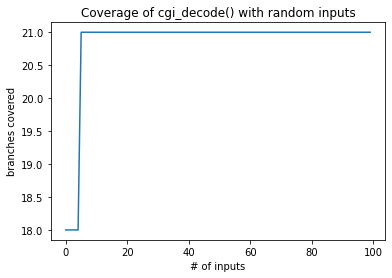

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cumulative_branch)
plt.title('Coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('branches covered')


In [154]:
runs = 100
sum_branch = [0] * trials
for run in range(runs):
    all_branch, branch = population_coverage(hundred_inputs(), cgi_decode)
    assert len(branch) == trials
    for i in range(trials):
        sum_branch[i] += branch[i]

average_branch = []
for i in range(trials):
    average_branch.append(sum_branch[i] / runs)


Text(0, 0.5, 'branches covered')

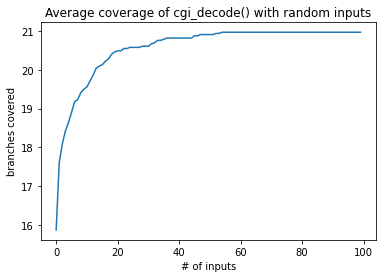

In [155]:
plt.plot(average_branch)
plt.title('Average coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('branches covered')
